In [ ]:
#importação das bibliotecas pandas, seaborn, matplotlib e ploty.express
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#importação da base de dados diretamente da internet
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1pkOP40FvztNt0pnWgKMG5iTXzRt4TW_N/view?usp=sharing'


file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
dfs = pd.read_csv(csv_raw)
print(dfs.head())

In [ ]:
#utilização do método .columns para ver as colunas do DataFrame

dfs.columns

Index(['ï»¿AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [ ]:
#1 - Quantas reclamações foram registradas em 2016, contidas nesta base?

#Usando o método .value_counts() é possível ver o total de reclamações feitas no ano de 2016: 203486

dfs['ï»¿AnoCalendario'].value_counts()

2016    203486
Name: ï»¿AnoCalendario, dtype: int64

In [ ]:
#2 - Qual região houve mais reclamação? E qual houve menos?

#Ao extrair os dados da coluna Regiao, nos é permitido verificar o número de reclamações por região
#A região com mais reclamações foi a Região Nordeste, com 66411 reclamações no total
#A região com menor número de reclamações foi a Norte, com 19202 reclamações no total

dfs['Regiao'].value_counts()

Nordeste        66411
Sudeste         62974
Centro-oeste    28786
Sul             26113
Norte           19202
Name: Regiao, dtype: int64

In [ ]:
#3 - Qual a quantidade de reclamações realizadas por homens? E por mulheres?

#O número de reclamações feitas por homens e mulheres pode ser observado utilizando .value_counts() na coluna 'SexoConsumidor'
#os homens foram responsáveis por 94446 das reclamações, já as mulheres, por 107229 delas.

dfs['SexoConsumidor'].value_counts()

F    107229
M     94446
N      1809
Name: SexoConsumidor, dtype: int64

In [ ]:
#4 - Em qual região os homens fizeram mais reclamações que as mulheres?

#utilizando o método groupby() nas colunas 'Regiao' e 'SexoConsumidor' é possível ver o total de reclamações feitas por cada sexo e em cada região
#A região onde os homens fizeram mais reclamações que as mulheres foi a região Sul

dfs.groupby(['Regiao', 'SexoConsumidor']).count()

ï»¿AnoCalendario  DataArquivamento  DataAbertura  \
Regiao       SexoConsumidor                                                     
Centro-oeste F                          14122             14122         14122   
             M                          13585             13585         13585   
             N                           1079              1079          1079   
Nordeste     F                          37081             37081         37081   
             M                          29065             29065         29065   
             N                            265               265           265   
Norte        F                           9654              9654          9654   
             M                           9529              9529          9529   
             N                             19                19            19   
Sudeste      F                          33600             33600         33600   
             M                          29242             29242         29242   
             N                            130               130           130   
Sul          F                          12772             12772         12772   
             M                          13025             13025         13025   
             N                            316               316           316   

                             CodigoRegiao     UF  strRazaoSocial  \
Regiao       SexoConsumidor                                        
Centro-oeste F                      14122  14122           14122   
             M                      13585  13585           13585   
             N                       1079   1079            1079   
Nordeste     F                      37081  37081           37080   
             M                      29065  29065           29064   
             N                        265    265             265   
Norte        F                       9654   9654            9654   
             M                       9529   9529            9528   
             N                         19     19              19   
Sudeste      F                      33600  33600           33600   
             M                      29242  29242           29242   
             N                        130    130             130   
Sul          F                      12772  12772           12772   
             M                      13025  13025           13025   
             N                        316    316             316   

                             strNomeFantasia   Tipo  NumeroCNPJ  RadicalCNPJ  \
Regiao       SexoConsumidor                                                    
Centro-oeste F                         12073  14122       13938        13938   
             M                         11534  13585       13416        13416   
             N                           979   1079        1053         1053   
Nordeste     F                         30463  37081       35229        35229   
             M                         23777  29065       27598        27598   
             N                           243    265         264          264   
Norte        F                          9103   9654        9056         9056   
             M                          9017   9529        8975         8975   
             N                            19     19          19           19   
Sudeste      F                         28827  33600       32755        32755   
             M                         24970  29242       28469        28469   
             N                           117    130         128          128   
Sul          F                         11193  12772       11948        11948   
             M                         11126  13025       12140        12140   
             N                           279    316         302          302   

                             ...  NomeFantasiaRFB  CNAEPrincipal  \
Regiao       SexoConsumidor  ...                                 

In [ ]:
#5 - Qual a faixa etária que realizou mais reclamações?

#Para verificar o número de reclamações por faixa etária é utilizado novamente value_counts()
#A faixa etária que mais realizou reclamações foi entre 31 a 40 anos, com 45422 reclamações no total

dfs['FaixaEtariaConsumidor'].value_counts()

entre 31 a 40 anos    45422
entre 41 a 50 anos    37963
entre 21 a 30 anos    33237
entre 51 a 60 anos    31717
entre 61 a 70 anos    22660
Nao Informada         16790
mais de 70 anos       10893
atÃ© 20 anos           4804
Name: FaixaEtariaConsumidor, dtype: int64

In [ ]:
#6 - Quais assuntos apresentaram mais reclamações em 2016?

#O método value_counts() é novamente utilizado, desta vez na coluna 'DescricaoAssunto', permitindo ver a quantidade de reclamações por assunto
#O assunto com maior número de reclamações foi o de telefone (Convencional, Celular, Interfone, Etc.), com 21272 reclamações no total   

dfs['DescricaoAssunto'].value_counts()

Telefone ( Convencional, Celular, Interfone, Etc. )                                      21272
Telefonia Celular                                                                        15102
CartÃ£o de CrÃ©dito                                                                      11774
Telefonia Fixa ( Plano de ExpansÃ£o / Compra e Venda / LocaÃ§Ã£o )                       11056
Banco comercial                                                                           9274
                                                                                         ...  
PÃ³s para preparo (refresco, gelatina, pudim, bolos, pÃ£o de queijo, pizza e sorvete)        1
Profissional Liberal - VeterinÃ¡rio                                                          1
Venda atravÃ©s de reembolso postal a domicilio                                               1
Ãgua                                                                                        1
Ovos                                              

In [ ]:
#7 - Analisando o nome fantasia, determine qual empresa recebeu mais reclamações em 2016.

#O número de reclamações por empresa(nome fantasia) pode ser verificado utilizando value_counts()
#A empresa OI foi  a empresa com mais reclamações no ano de 2016

dfs['strNomeFantasia'].value_counts()

OI                                                 2732
SKY                                                2615
SAMSUNG                                            2127
PONTOFRIO.COM.BR/CASASBAHIA.COM.BR/EXTRA.COM.BR    2106
OI FIXO                                            2080
                                                   ... 
VIRTUAL BRASIL                                        1
SPORT RODAS E PNEUS                                   1
RAPI10 VIAGENS ON LINE                                1
CONVENIENCIA TOCANTINS                                1
ESSENCE CARE                                          1
Name: strNomeFantasia, Length: 26719, dtype: int64

In [ ]:
#8 - Qual empresa possui um maior percentual de resolução de reclamações?

#utilizar value_counts() nas colunas 'strNomeFantasia' e 'Atendida' nos permite ver o número de reclamações atendidas por empresa
#A empresa OI foi a que mais atendeu, e por consequência, resolveu reclamações

dfs[['strNomeFantasia','Atendida']].value_counts()

strNomeFantasia                                     Atendida
OI                                                  S           2098
PONTOFRIO.COM.BR/CASASBAHIA.COM.BR/EXTRA.COM.BR     S           1734
SKY                                                 S           1728
OI FIXO                                             S           1723
VIVO                                                S           1312
                                                                ... 
FORMULA TIJU FITNESS CENTER - ACADEMIA DE GINASTIC  N              1
FORMULA SERVICE                                     S              1
FORMULA                                             S              1
FORMISHOP.COM                                       N              1
ÃTIL MAIS COMÃRCIO ELETRÃNICO                    S              1
Length: 32201, dtype: int64

In [ ]:
#Este bloco de código adicional pode ser utilizado para calcular o percentual de resolução de reclamações
#A váriavel total recebe o número de reclamações feitas, e a váriavel atend a quantidade atendidas
#Após isso, na váriavel porcent é realizado um cálculo utilizando a regra de 3 
#Por fim a função print nos mostra em tela o resultado

total = int(input('Digite o número total de reclamações:'))
atend = int(input('Digite o número de reclamações atendidas:'))

porcent = (round((atend*100)/total))
print('Foram resolvidas ' + str(porcent) + '% das reclamações')

Digite o número total de reclamações:2732
Digite o número de reclamações atendidas:2098
Foram resolvidas 77% das reclamações


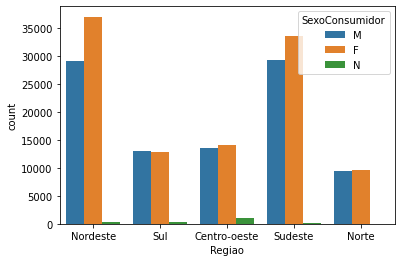

In [ ]:
#9 - Monte um gráfico mostrando a quantidade de reclamações por região, separando as mesmas por sexo

#A biblioteca seaborn nos permite a construção de gráficos. Assim, após a importação da biblioteca, basta fazer uso do método sns.countplot() para construir um gráfico de barras
#São extraidas da base de dados as colunas 'Regiao' e 'SexoConsumidor' que serão , respectivamente, os eixos x e y

sns.countplot(x='Regiao', hue='SexoConsumidor', data=dfs)

In [ ]:
#10 - Elabore um gráfico de linhas com a quantidade de reclamações por mês. Este gráfico lembra alguma distribuição estatística?

#Primeiramente é preciso converter os dados da coluna 'DataAbertura' para o tipo datetime, utilizando o método pd.to_datetime()
#Depois, os meses são extraidos através do método dt.month
#Por fim, value_counts() nos permite vizualizar o número de reclamações por mês

dfs['DataAbertura'] = pd.to_datetime(dfs['DataAbertura'])

dfs['Month'] = dfs['DataAbertura'].dt.month

dfs.Month.value_counts()

3     20519
8     17993
5     17708
2     17462
1     17412
4     17183
11    16622
7     16245
10    16178
9     15874
6     15415
12    14875
Name: Month, dtype: int64

In [ ]:
#criando listas com os dados obtidos acima, que serão usadas para a criação do gráfico de linhas

mes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
quantidade = [17412, 17462, 20519, 17183, 17708, 15415, 16245, 17993, 15874, 16178, 16622, 14875]


<function matplotlib.pyplot.show>

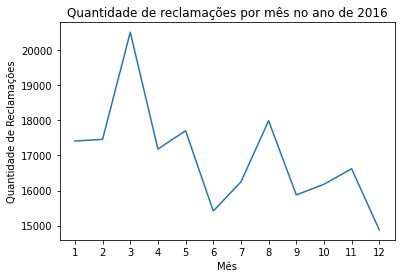

In [ ]:
#Para elaborar o gráfico de linhas é preciso primeiro importar a biblioteca matplotlib, para utilizar o método plt.plot()
#As listas mes e quantidade serão os eixos x e y, respectivamente
#O gráfico lembra a distribuição binominal

plt.plot(mes, quantidade)
plt.title('Quantidade de reclamações por mês no ano de 2016')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Reclamações')
plt.show

In [ ]:
#11 - Elabore um gráfico boxplot mostrando a quantidade de reclamações por região.

#verificando a quais regiões pertencem os respectivos códigos e também a quantidade na base de dados

dfs[['Regiao', 'CodigoRegiao']].value_counts()

Regiao        CodigoRegiao
Nordeste      2               66411
Sudeste       3               62974
Centro-oeste  5               28786
Sul           4               26113
Norte         1               19202
dtype: int64

In [ ]:
#criando dataframe com os códigos de região e suas respectivas quantidades de reclamações

base = pd.DataFrame({'codRegiao':[1,2,3,4,5],
                    'quantPorRegiao':[19202, 66411, 62974, 26113, 28786]})

print(base)

   codRegiao  quantPorRegiao
0          1           19202
1          2           66411
2          3           62974
3          4           26113
4          5           28786


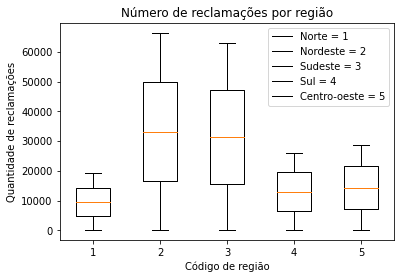

In [ ]:
#criação do gráfico boxplot com o número de reclamações por região

plt.boxplot(base)
plt.title('Número de reclamações por região')
plt.xlabel('Código de região')
plt.ylabel('Quantidade de reclamações')
plt.legend(['Norte = 1', 'Nordeste = 2', 'Sudeste = 3', 'Sul = 4', 'Centro-oeste = 5'], loc = 1)
plt.show()

In [ ]:
#12 - É possível afirmar que existe correlação entre o número de reclamações E o número de habitantes por Estado? Elabore um gráfico de dispersão e calcule o índice de correlação destes dois fatores.

#Através do método value_counts é possível verificar a quantidade de reclamações por estado, utilzando a coluna 'UF'

dfs['UF'].value_counts()


SP    31548
PE    20175
BA    17519
SC    16718
MG    15159
ES    11383
CE    10833
TO    10232
MS     9789
PR     9132
MT     8770
GO     8060
PB     7464
RJ     4884
RN     4443
RO     3922
MA     3597
PA     2730
AM     2318
PI     2189
DF     2167
RS      263
AL      191
Name: UF, dtype: int64

In [ ]:
#Um novo dataframe é criado utilizando o método pd.DateFrame() com os dados obtidos acima
#As estimativas populacionais foram obtidas do site do IBGE 
#FONTE:https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html

df = pd.DataFrame({'UF':['SP','PE', 'BA', 'SC', 'MG', 'ES', 'CE', 'TO', 'MS', 'PR', 'MT', 'GO', 'PB', 'RJ', 'RN', 'RO', 'MA', 'PA', 'AM', 'PI', 'DF', 'RS', 'AL' ],
                   'habitantes':[44749699, 9410336, 15276566, 6910553, 20997560, 3973697, 8963663, 1532902, 2682386, 11242720, 3305531, 6695855, 3999415, 16635996,
                    3474998, 514229, 6954036, 8272724, 4001667, 3212180, 2977216, 11286500, 3358963],
                   'NdeReclamações':[31548, 20175, 17519, 16718, 15159, 11383, 10833, 10232, 9789, 9132, 8770, 8060, 7464, 4884, 4443, 3922, 3597, 2730, 2318, 2189,
                                     2167, 263, 191]})

print(df)

    UF  habitantes  NdeReclamações
0   SP    44749699           31548
1   PE     9410336           20175
2   BA    15276566           17519
3   SC     6910553           16718
4   MG    20997560           15159
5   ES     3973697           11383
6   CE     8963663           10833
7   TO     1532902           10232
8   MS     2682386            9789
9   PR    11242720            9132
10  MT     3305531            8770
11  GO     6695855            8060
12  PB     3999415            7464
13  RJ    16635996            4884
14  RN     3474998            4443
15  RO      514229            3922
16  MA     6954036            3597
17  PA     8272724            2730
18  AM     4001667            2318
19  PI     3212180            2189
20  DF     2977216            2167
21  RS    11286500             263
22  AL     3358963             191


In [ ]:
#O método corr() calcula a correlação entre o número de habitantes e a número de reclamações
#O calculo indica que existe uma correlação forte entre o número de reclamações e o número de habitantes por Estado

df['habitantes'].corr(df['NdeReclamações'])

0.708557502040417

In [ ]:
#O gráfico de dispersão pode ser construido utilizando o método px.scatter(), pertecente a biblioteca ploty.express
#Apenas as colunas 'habitantes' e 'NdeReclamações' serão utilizadas, sendo respectivamente os eixos x e y

fig  = px.scatter(df, x = 'habitantes', y = 'NdeReclamações', log_x = True, width = 800)
fig.update_xaxes(title = 'Número de Habitantes')
fig.update_yaxes(title = 'Número de Reclamações')
fig.show()

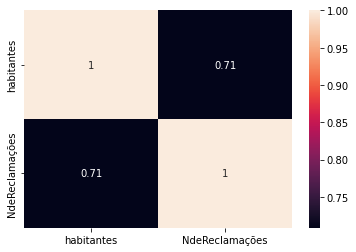

In [ ]:
#Para ajudar na verifação, um mapa de calor é construido através do método sns.heatmap(), da biblioteca seaborn
#O mapa de calor ajuda a visualizar se há ou não correlação entre habitantes e número de reclamações. Neste caso, ele indica que há uma correlação forte

sns.heatmap(df[['habitantes', 'NdeReclamações']].corr(), annot=True)
plt.show()

In [ ]:
#comando para converter o notebook em um arquivo html
%%shell
jupyter nbconvert --to html /content/AtividadeAtivaProbabilidade_Estatística.ipynb

[NbConvertApp] Converting notebook /content/AtividadeAtivaProbabilidade_Estatística.ipynb to html
[NbConvertApp] Writing 405401 bytes to /content/AtividadeAtivaProbabilidade_Estatística.html
